In [51]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression

In [52]:
mass_data = pd.read_csv("../eco_v_nukes/data/18-07-24 09_35_36_theglobaleconomy.csv")
mass_data.head()

,Country,Code,ContinentCode,Year,Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,GDP per capita constant 2010 dollars,Trade openness: exports plus imports as percent of GDP,Government spending as percent of GDP,...,Oil production thousand barrels per day,Gasoline production thousand barrels per day,Liquefied petroleum gas production thousand barrels per day,Nuclear electricity capacity million kilowatts,Nuclear power generation billion kilowatthours,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Human Development Index (0 - 1)
0,Afghanistan,AFG,AS,1960,NaN,62.37,NaN,NaN,11.16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,AS,1961,NaN,62.44,NaN,NaN,12.55,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,AS,1962,NaN,60.95,NaN,NaN,14.23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,AS,1963,NaN,82.02,NaN,NaN,26.04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,AS,1964,NaN,85.51,NaN,NaN,26.94,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
mass_data.sample()

,Country,Code,ContinentCode,Year,Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,GDP per capita constant 2010 dollars,Trade openness: exports plus imports as percent of GDP,Government spending as percent of GDP,...,Oil production thousand barrels per day,Gasoline production thousand barrels per day,Liquefied petroleum gas production thousand barrels per day,Nuclear electricity capacity million kilowatts,Nuclear power generation billion kilowatthours,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Human Development Index (0 - 1)
2832,Ecuador,ECU,SA,1979,3.73,1789.23,NaN,4112.93,36.08,18.84,...,214.07,NaN,NaN,NaN,NaN,0.19,1.99,NaN,NaN,NaN


In [54]:
mass_data.describe()

,Year,Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,GDP per capita constant 2010 dollars,Trade openness: exports plus imports as percent of GDP,Government spending as percent of GDP,Government spending billion USD,Government debt as percent of GDP,Economic growth forecast,Oil production thousand barrels per day,Gasoline production thousand barrels per day,Liquefied petroleum gas production thousand barrels per day,Nuclear electricity capacity million kilowatts,Nuclear power generation billion kilowatthours,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Human Development Index (0 - 1)
count,11157.000000,9603.000000,9959.000000,5911.000000,9619.000000,8285.000000,8100.000000,8178.000000,4961.000000,7593.000000,5327.000000,5496.000000,5496.000000,7631.000000,7631.000000,7829.000000,7512.000000,4247.000000,5.278000e+03,5594.000000
mean,1994.363090,3.724577,8987.942468,18297.364236,11598.141572,78.155067,15.821849,41.629101,55.546003,3.380615,550.501049,111.829896,16.480750,1.727853,11.411160,6.333228,2.714334,7.658834,1.669748e+05,0.660144
std,17.730054,6.309177,18178.200156,20650.061835,18933.300024,51.602307,6.714763,185.769018,44.088900,6.257111,1455.992217,631.421118,63.025122,8.962397,61.500703,39.384126,3.197292,6.497062,3.966437e+05,0.166521
min,1960.000000,-64.050000,11.790000,430.000000,122.880000,0.020000,0.000000,0.000000,0.000000,-54.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,5.000000e+01,0.189000
25%,1980.000000,1.330000,578.220000,3626.000000,1312.925000,44.970000,11.130000,0.430000,28.570000,1.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000,1.190000,3.310000,1.145000e+04,0.535000
50%,1996.000000,3.830000,2044.320000,10402.000000,3637.420000,67.640000,15.150000,2.100000,47.600000,3.570000,16.000000,3.100000,0.300000,0.000000,0.000000,0.340000,1.890000,5.500000,3.725000e+04,0.685000
75%,2009.000000,6.310000,8302.130000,26662.000000,13591.355000,97.730000,19.250000,12.920000,69.760000,5.910000,287.235000,45.662500,7.475000,0.000000,0.000000,2.210000,3.150000,10.010000,1.475750e+05,0.791000
max,2023.000000,149.970000,240862.190000,157601.000000,228667.940000,442.620000,79.520000,3570.080000,600.120000,147.970000,12248.020000,9571.000000,776.520000,101.890000,809.410000,876.940000,117.350000,57.480000,4.135000e+06,0.962000


In [55]:
mass_data['Year']

0        1960
1        1961
2        1962
3        1963
4        1964
         ... 
11152    2019
11153    2020
11154    2021
11155    2022
11156    2023
Name: Year, Length: 11157, dtype: int64

In [56]:
mass_data_2020 = mass_data[mass_data['Year'] == 2020]
mass_data_2020

,Country,Code,ContinentCode,Year,Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,GDP per capita constant 2010 dollars,Trade openness: exports plus imports as percent of GDP,Government spending as percent of GDP,...,Oil production thousand barrels per day,Gasoline production thousand barrels per day,Liquefied petroleum gas production thousand barrels per day,Nuclear electricity capacity million kilowatts,Nuclear power generation billion kilowatthours,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Human Development Index (0 - 1)
60,Afghanistan,AFG,AS,2020,-2.35,512.06,1968.0,529.14,46.71,22.11,...,0.00,NaN,NaN,0.0,0.0,0.28,1.36,4.97,165000.0,0.511
108,Albania,ALB,EU,2020,-3.30,5343.04,13278.0,4418.66,59.83,11.85,...,17.26,NaN,NaN,0.0,0.0,0.20,1.30,3.98,8000.0,0.795
172,Algeria,DZA,AF,2020,-5.10,3354.15,10845.0,3873.51,45.69,18.79,...,1122.43,NaN,NaN,0.0,0.0,9.71,6.69,17.82,326000.0,0.748
226,Andorra,AND,EU,2020,-11.18,37207.24,NaN,34394.43,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.868
277,Angola,AGO,AF,2020,-5.64,1450.91,6030.0,2435.02,65.94,8.75,...,1256.67,NaN,NaN,0.0,0.0,0.99,1.70,7.46,117000.0,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10937,Venezuela,VEN,SA,2020,NaN,NaN,NaN,NaN,NaN,NaN,...,527.06,NaN,NaN,0.0,0.0,0.00,1.58,NaN,343000.0,0.711
10981,Vietnam,VNM,AS,2020,2.87,3586.35,10451.0,3352.06,163.25,9.48,...,193.32,NaN,NaN,0.0,0.0,NaN,NaN,NaN,522000.0,0.704
11025,Yemen,YEM,AS,2020,NaN,578.51,NaN,1057.28,NaN,NaN,...,58.28,NaN,NaN,0.0,0.0,NaN,NaN,NaN,40000.0,0.470
11089,Zambia,ZMB,AF,2020,-2.79,956.83,3184.0,1237.28,79.33,14.71,...,0.00,NaN,NaN,0.0,0.0,0.21,1.17,3.43,16000.0,0.584


In [57]:
countries_with_nukes = ['Russia', 'United States', 'France', 'China', 'United Kingdom', 'Israel', 'Pakistan', 'India', 'North Korea']

In [58]:
econo_rate_with_nukes = ['Russia', 'United States', 'France', 'China', 'United Kingdom', 'Israel', 'Pakistan', 'India', 'North Korea']

In [59]:
countries_nukes = mass_data_2020[mass_data_2020['Country'].isin(countries_with_nukes)]
countries_nukes

,Country,Code,ContinentCode,Year,Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,GDP per capita constant 2010 dollars,Trade openness: exports plus imports as percent of GDP,Government spending as percent of GDP,...,Oil production thousand barrels per day,Gasoline production thousand barrels per day,Liquefied petroleum gas production thousand barrels per day,Nuclear electricity capacity million kilowatts,Nuclear power generation billion kilowatthours,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Human Development Index (0 - 1)
2192,China,CHN,AS,2020,2.24,10408.72,16297.0,10358.17,34.75,17.13,...,3888.99,NaN,NaN,49.89,366.25,257.97,1.76,4.77,2535000.0,0.761
3471,France,FRA,EU,2020,-7.54,39179.75,42345.0,35806.62,56.78,24.84,...,12.94,NaN,NaN,61.37,335.41,52.75,2.00,3.26,304000.0,0.901
4554,India,IND,AS,2020,-5.83,1913.22,6172.0,1813.53,37.80,11.61,...,627.42,NaN,NaN,6.78,46.47,72.94,2.81,8.78,3068000.0,0.645
4874,Israel,ISR,AS,2020,-1.86,44846.79,39681.0,38176.75,50.96,23.23,...,3.00,NaN,NaN,0.00,0.00,21.82,5.28,11.81,178000.0,0.919
7391,North Korea,PRK,AS,2020,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,0.00,NaN,NaN,NaN,1469000.0,NaN
7611,Pakistan,PAK,AS,2020,-1.27,1322.31,5004.0,1578.43,26.72,11.79,...,74.09,NaN,NaN,1.32,9.64,10.41,3.02,17.46,943000.0,0.557
8395,Russia,RUS,EU,2020,-2.65,10194.44,26587.0,9714.38,45.97,19.97,...,9865.42,NaN,NaN,28.58,215.75,61.71,4.17,10.59,1454000.0,0.824
10663,United Kingdom,GBR,EU,2020,-10.36,40217.01,41896.0,42191.92,58.77,22.60,...,950.78,NaN,NaN,8.92,45.67,58.33,2.16,4.33,153000.0,0.932


In [60]:
# Extract the economic growth data for countries without nuclear weapons
econo_rate_with_nukes = ['Russia', 'United States', 'France', 'China', 'United Kingdom', 'Israel', 'Pakistan', 'India', 'North Korea']
econo_not_nukes = mass_data_2020[~mass_data_2020['Country'].isin(econo_rate_with_nukes)][['Country', 'Year', 'Economic growth: the rate of change of real GDP']]

# Display the first few rows of the extracted data
econo_not_nukes.head()

,Country,Year,Economic growth: the rate of change of real GDP
60,Afghanistan,2020,-2.35
108,Albania,2020,-3.30
172,Algeria,2020,-5.10
226,Andorra,2020,-11.18
277,Angola,2020,-5.64


In [61]:
countries_not_nukes = mass_data_2020[~mass_data_2020['Country'].isin(countries_with_nukes)]
countries_not_nukes

,Country,Code,ContinentCode,Year,Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,GDP per capita constant 2010 dollars,Trade openness: exports plus imports as percent of GDP,Government spending as percent of GDP,...,Oil production thousand barrels per day,Gasoline production thousand barrels per day,Liquefied petroleum gas production thousand barrels per day,Nuclear electricity capacity million kilowatts,Nuclear power generation billion kilowatthours,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Human Development Index (0 - 1)
60,Afghanistan,AFG,AS,2020,-2.35,512.06,1968.0,529.14,46.71,22.11,...,0.00,NaN,NaN,0.0,0.0,0.28,1.36,4.97,165000.0,0.511
108,Albania,ALB,EU,2020,-3.30,5343.04,13278.0,4418.66,59.83,11.85,...,17.26,NaN,NaN,0.0,0.0,0.20,1.30,3.98,8000.0,0.795
172,Algeria,DZA,AF,2020,-5.10,3354.15,10845.0,3873.51,45.69,18.79,...,1122.43,NaN,NaN,0.0,0.0,9.71,6.69,17.82,326000.0,0.748
226,Andorra,AND,EU,2020,-11.18,37207.24,NaN,34394.43,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.868
277,Angola,AGO,AF,2020,-5.64,1450.91,6030.0,2435.02,65.94,8.75,...,1256.67,NaN,NaN,0.0,0.0,0.99,1.70,7.46,117000.0,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10937,Venezuela,VEN,SA,2020,NaN,NaN,NaN,NaN,NaN,NaN,...,527.06,NaN,NaN,0.0,0.0,0.00,1.58,NaN,343000.0,0.711
10981,Vietnam,VNM,AS,2020,2.87,3586.35,10451.0,3352.06,163.25,9.48,...,193.32,NaN,NaN,0.0,0.0,NaN,NaN,NaN,522000.0,0.704
11025,Yemen,YEM,AS,2020,NaN,578.51,NaN,1057.28,NaN,NaN,...,58.28,NaN,NaN,0.0,0.0,NaN,NaN,NaN,40000.0,0.470
11089,Zambia,ZMB,AF,2020,-2.79,956.83,3184.0,1237.28,79.33,14.71,...,0.00,NaN,NaN,0.0,0.0,0.21,1.17,3.43,16000.0,0.584


In [62]:
countries_not_nukes["Human Development Index (0 - 1)"].info()

<class 'pandas.core.series.Series'>
Index: 192 entries, 60 to 11153
Series name: Human Development Index (0 - 1)
Non-Null Count  Dtype  
--------------  -----  
177 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [63]:
econo_not_nukes['Economic growth: the rate of change of real GDP'].info()

<class 'pandas.core.series.Series'>
Index: 192 entries, 60 to 11153
Series name: Economic growth: the rate of change of real GDP
Non-Null Count  Dtype  
--------------  -----  
183 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [64]:
econo_not_nukes = econo_not_nukes.dropna(subset=['Economic growth: the rate of change of real GDP'])
econo_not_nukes['Economic growth: the rate of change of real GDP'].info()

<class 'pandas.core.series.Series'>
Index: 183 entries, 60 to 11153
Series name: Economic growth: the rate of change of real GDP
Non-Null Count  Dtype  
--------------  -----  
183 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [65]:
countries_not_nukes = countries_not_nukes.dropna(subset=["Human Development Index (0 - 1)"])
countries_not_nukes["Human Development Index (0 - 1)"].info()

<class 'pandas.core.series.Series'>
Index: 177 entries, 60 to 11153
Series name: Human Development Index (0 - 1)
Non-Null Count  Dtype  
--------------  -----  
177 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [66]:
econo_not_nukes

,Country,Year,Economic growth: the rate of change of real GDP
60,Afghanistan,2020,-2.35
108,Albania,2020,-3.30
172,Algeria,2020,-5.10
226,Andorra,2020,-11.18
277,Angola,2020,-5.64
...,...,...,...
10828,Uzbekistan,2020,2.00
10873,Vanuatu,2020,-4.99
10981,Vietnam,2020,2.87
11089,Zambia,2020,-2.79


In [67]:
countries_nukes

,Country,Code,ContinentCode,Year,Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,GDP per capita constant 2010 dollars,Trade openness: exports plus imports as percent of GDP,Government spending as percent of GDP,...,Oil production thousand barrels per day,Gasoline production thousand barrels per day,Liquefied petroleum gas production thousand barrels per day,Nuclear electricity capacity million kilowatts,Nuclear power generation billion kilowatthours,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Human Development Index (0 - 1)
2192,China,CHN,AS,2020,2.24,10408.72,16297.0,10358.17,34.75,17.13,...,3888.99,NaN,NaN,49.89,366.25,257.97,1.76,4.77,2535000.0,0.761
3471,France,FRA,EU,2020,-7.54,39179.75,42345.0,35806.62,56.78,24.84,...,12.94,NaN,NaN,61.37,335.41,52.75,2.00,3.26,304000.0,0.901
4554,India,IND,AS,2020,-5.83,1913.22,6172.0,1813.53,37.80,11.61,...,627.42,NaN,NaN,6.78,46.47,72.94,2.81,8.78,3068000.0,0.645
4874,Israel,ISR,AS,2020,-1.86,44846.79,39681.0,38176.75,50.96,23.23,...,3.00,NaN,NaN,0.00,0.00,21.82,5.28,11.81,178000.0,0.919
7391,North Korea,PRK,AS,2020,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,0.00,NaN,NaN,NaN,1469000.0,NaN
7611,Pakistan,PAK,AS,2020,-1.27,1322.31,5004.0,1578.43,26.72,11.79,...,74.09,NaN,NaN,1.32,9.64,10.41,3.02,17.46,943000.0,0.557
8395,Russia,RUS,EU,2020,-2.65,10194.44,26587.0,9714.38,45.97,19.97,...,9865.42,NaN,NaN,28.58,215.75,61.71,4.17,10.59,1454000.0,0.824
10663,United Kingdom,GBR,EU,2020,-10.36,40217.01,41896.0,42191.92,58.77,22.60,...,950.78,NaN,NaN,8.92,45.67,58.33,2.16,4.33,153000.0,0.932


In [68]:
countries_nukes = countries_nukes[countries_nukes['Country']!='North Korea']
countries_nukes

,Country,Code,ContinentCode,Year,Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,GDP per capita constant 2010 dollars,Trade openness: exports plus imports as percent of GDP,Government spending as percent of GDP,...,Oil production thousand barrels per day,Gasoline production thousand barrels per day,Liquefied petroleum gas production thousand barrels per day,Nuclear electricity capacity million kilowatts,Nuclear power generation billion kilowatthours,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Human Development Index (0 - 1)
2192,China,CHN,AS,2020,2.24,10408.72,16297.0,10358.17,34.75,17.13,...,3888.99,NaN,NaN,49.89,366.25,257.97,1.76,4.77,2535000.0,0.761
3471,France,FRA,EU,2020,-7.54,39179.75,42345.0,35806.62,56.78,24.84,...,12.94,NaN,NaN,61.37,335.41,52.75,2.00,3.26,304000.0,0.901
4554,India,IND,AS,2020,-5.83,1913.22,6172.0,1813.53,37.80,11.61,...,627.42,NaN,NaN,6.78,46.47,72.94,2.81,8.78,3068000.0,0.645
4874,Israel,ISR,AS,2020,-1.86,44846.79,39681.0,38176.75,50.96,23.23,...,3.00,NaN,NaN,0.00,0.00,21.82,5.28,11.81,178000.0,0.919
7611,Pakistan,PAK,AS,2020,-1.27,1322.31,5004.0,1578.43,26.72,11.79,...,74.09,NaN,NaN,1.32,9.64,10.41,3.02,17.46,943000.0,0.557
8395,Russia,RUS,EU,2020,-2.65,10194.44,26587.0,9714.38,45.97,19.97,...,9865.42,NaN,NaN,28.58,215.75,61.71,4.17,10.59,1454000.0,0.824
10663,United Kingdom,GBR,EU,2020,-10.36,40217.01,41896.0,42191.92,58.77,22.60,...,950.78,NaN,NaN,8.92,45.67,58.33,2.16,4.33,153000.0,0.932


In [69]:
stats.ttest_ind(countries_nukes["Human Development Index (0 - 1)"], countries_not_nukes["Human Development Index (0 - 1)"])

TtestResult(statistic=1.2420028379791999, pvalue=0.21583359593048396, df=182.0)

In [77]:
# List of countries with nuclear weapons
econo_rate_with_nukes_list = ['Russia', 'United States', 'France', 'China', 'United Kingdom', 'Israel', 'Pakistan', 'India', 'North Korea']

# Filter the data to only include rows from the year 2020
mass_data_2020 = mass_data_2020[mass_data_2020['Year'] == 2020]

# Extract economic growth data for countries with and without nuclear weapons
econo_rate_with_nukes = mass_data_2020[mass_data_2020['Country'].isin(econo_rate_with_nukes_list)][['Country', 'Economic growth: the rate of change of real GDP']]
econo_not_nukes = mass_data_2020[~mass_data_2020['Country'].isin(econo_rate_with_nukes_list)][['Country', 'Economic growth: the rate of change of real GDP']]

# Check for missing values
print(f"Missing values in econo_rate_with_nukes: {econo_rate_with_nukes['Economic growth: the rate of change of real GDP'].isnull().sum()}")
print(f"Missing values in econo_not_nukes: {econo_not_nukes['Economic growth: the rate of change of real GDP'].isnull().sum()}")

# Remove rows with missing values
econo_rate_with_nukes_clean = econo_rate_with_nukes.dropna(subset=['Economic growth: the rate of change of real GDP'])
econo_not_nukes_clean = econo_not_nukes.dropna(subset=['Economic growth: the rate of change of real GDP'])

# Perform the t-test
t_stat, p_value = stats.ttest_ind(econo_rate_with_nukes_clean["Economic growth: the rate of change of real GDP"], econo_not_nukes_clean["Economic growth: the rate of change of real GDP"])

t_stat, p_value

Missing values in econo_rate_with_nukes: 1
Missing values in econo_not_nukes: 9


(0.37038730219900634, 0.711510895117478)

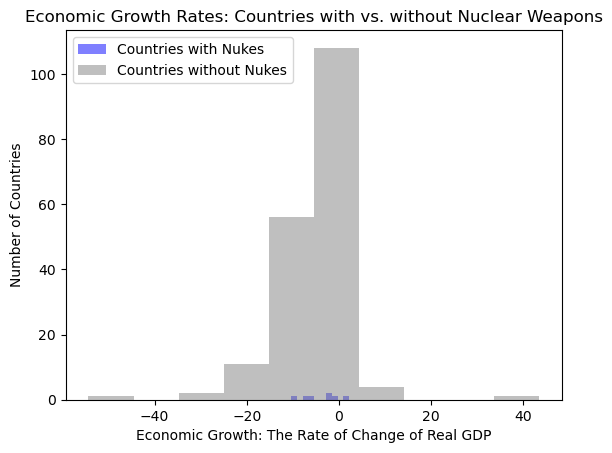

In [80]:
plt.hist(econo_rate_with_nukes_clean["Economic growth: the rate of change of real GDP"], alpha=0.5, color='blue', label='Countries with Nukes')
plt.hist(econo_not_nukes_clean["Economic growth: the rate of change of real GDP"], alpha=0.5, color='gray', label='Countries without Nukes')

# Adding labels and title
plt.xlabel('Economic Growth: The Rate of Change of Real GDP')
plt.ylabel('Number of Countries')
plt.title('Economic Growth Rates: Countries with vs. without Nuclear Weapons')
plt.legend()

# Display the plot
plt.show()

	1. Overlap: There is significant overlap between the purple and yellow bars. This means that both groups (countries with and without nuclear weapons) have a wide range of economic growth rates that are similar. For instance, both groups have countries with negative and positive growth rates.
	2.	Distribution: The spread of the bars indicates that economic growth rates vary widely within each group. There is no clear pattern that distinguishes the economic growth rates of countries with nuclear weapons from those without.
	3.	Significance: The t-test performed earlier (with a p-value of 0.7115) indicates that any observed differences in the economic growth rates between the two groups are not statistically significant. This means we cannot conclude that having nuclear weapons has a measurable impact on a country’s economic growth rate based on this data.
    
    In simple terms, the chart shows that there isn’t a noticeable or significant difference in the economic growth rates of countries with and without nuclear weapons. Both groups have countries that are growing and shrinking economically, and the differences we see in the chart could just be due to random chance rather than an actual effect of having nuclear weapons.

(array([ 5., 12., 18., 16., 13., 20., 30., 21., 19., 23.]),
 array([0.394 , 0.4503, 0.5066, 0.5629, 0.6192, 0.6755, 0.7318, 0.7881,
        0.8444, 0.9007, 0.957 ]),
 <BarContainer object of 10 artists>)

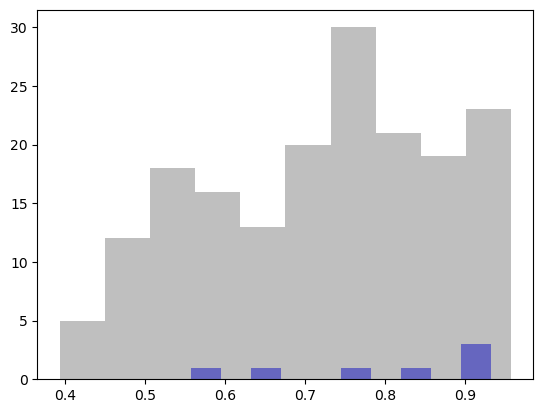

In [ ]:
plt.hist(countries_nukes["Human Development Index (0 - 1)"], alpha=0.7, color='blue')
plt.hist(countries_not_nukes["Human Development Index (0 - 1)"], alpha=0.5, color='gray')

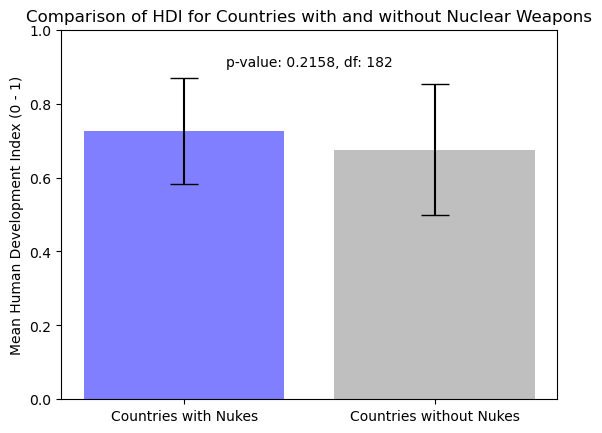

In [ ]:
hdi_nukes = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 0.55, 0.65, 0.75, 0.85, 0.95])
hdi_not_nukes = np.array([0.394 , 0.4503, 0.5066, 0.5629, 0.6192, 0.6755, 0.7318, 0.7881, 0.8444, 0.9007, 0.957 ])

# Perform the t-test
t_stat, p_value = ttest_ind(hdi_nukes, hdi_not_nukes)

# Calculate means and standard deviations
mean_hdi_nukes = np.mean(hdi_nukes)
mean_hdi_not_nukes = np.mean(hdi_not_nukes)
std_hdi_nukes = np.std(hdi_nukes)
std_hdi_not_nukes = np.std(hdi_not_nukes)

# Create bar plot with error bars
labels = ['Countries with Nukes', 'Countries without Nukes']
means = [mean_hdi_nukes, mean_hdi_not_nukes]
stds = [std_hdi_nukes, std_hdi_not_nukes]

x = np.arange(len(labels))

fig, ax = plt.subplots()
ax.bar(x, means, yerr=stds, align='center', alpha=0.5, capsize=10, color=['blue', 'gray'])
ax.set_ylabel('Mean Human Development Index (0 - 1)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Comparison of HDI for Countries with and without Nuclear Weapons')
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

# Annotate p-value and degrees of freedom
p_value_updated = 0.2158
df = 182
plt.text(0.5, 0.9, f'p-value: {p_value_updated:.4f}, df: {df}', horizontalalignment='center')

plt.show()

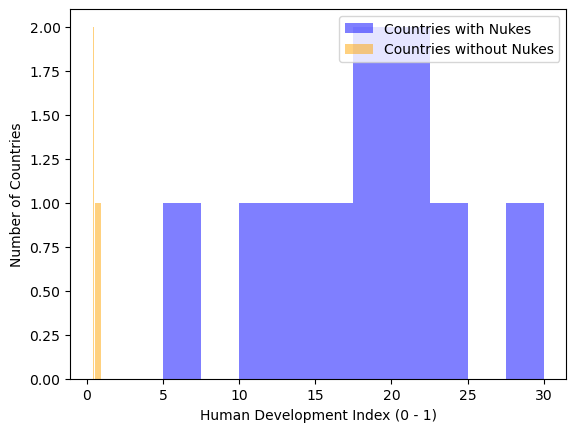

In [ ]:


# Data extracted from the image
countries_nukes_data = np.array([5., 12., 18., 16., 13., 20., 30., 21., 19., 23.])
countries_not_nukes_data = np.array([0.394 , 0.4503, 0.5066, 0.5629, 0.6192, 0.6755, 0.7318, 0.7881, 0.8444, 0.9007, 0.957 ])

# Plotting histograms with added labels, legend, and adjusted colors
plt.hist(countries_nukes_data, alpha=0.5, color='blue', label='Countries with Nukes')
plt.hist(countries_not_nukes_data, alpha=0.5, color='orange', label='Countries without Nukes')

# Adding labels
plt.xlabel('Human Development Index (0 - 1)')
plt.ylabel('Number of Countries')
plt.legend()

# Display the plot
plt.show()

Regression Coefficient: 0.04950000000000003
Intercept: 0.6755


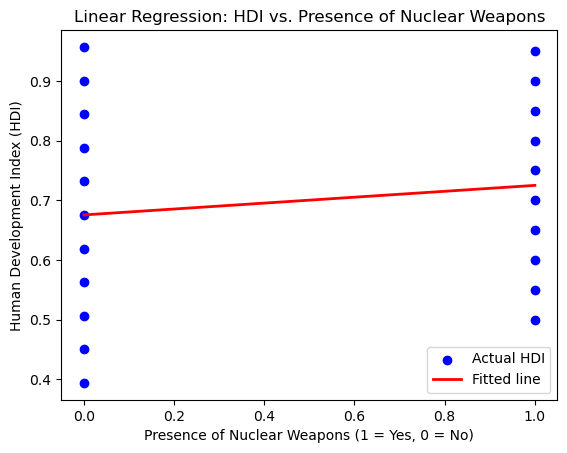

In [ ]:
# Example data (extend this with your actual data)
# Binary variable for nuclear weapons (1 = has nukes, 0 = no nukes)
nukes = np.array([1] * len(hdi_nukes) + [0] * len(hdi_not_nukes))
# HDI values
hdi_values = np.concatenate((hdi_nukes, hdi_not_nukes))

# Prepare the data
data = pd.DataFrame({
    'Nukes': nukes,
    'HDI': hdi_values
})

# Define independent and dependent variables
X = data[['Nukes']]  # Independent variable (presence of nukes)
y = data['HDI']      # Dependent variable (HDI)

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Get the regression coefficient and intercept
coefficient = model.coef_[0]
intercept = model.intercept_

print(f"Regression Coefficient: {coefficient}")
print(f"Intercept: {intercept}")

# Predict HDI values
predicted_hdi = model.predict(X)

# Plot the results
plt.scatter(X, y, color='blue', label='Actual HDI')
plt.plot(X, predicted_hdi, color='red', linewidth=2, label='Fitted line')
plt.xlabel('Presence of Nuclear Weapons (1 = Yes, 0 = No)')
plt.ylabel('Human Development Index (HDI)')
plt.title('Linear Regression: HDI vs. Presence of Nuclear Weapons')
plt.legend()
plt.show()

In this graph, we are trying to see if there is a relationship between a country having nuclear weapons and its Human Development Index (HDI), which is a measure of a country’s overall well-being.

The blue dots represent actual HDI values for countries, with the x-axis showing whether a country has nuclear weapons (1 means it has nukes, 0 means it doesn’t). The red line is our best guess of this relationship, showing the general trend. If the line slopes upwards, it means that countries with nuclear weapons tend to have a higher HDI. The closeness of the dots to the line indicates how well the presence of nuclear weapons predicts HDI.

In [ ]:
nukes = np.array([1] * len(hdi_nukes) + [0] * len(hdi_not_nukes))
# HDI values
hdi_values = np.concatenate((hdi_nukes, hdi_not_nukes))

# Prepare the data
data = pd.DataFrame({
    'Nukes': nukes,
    'HDI': hdi_values,
    'Label': ['Nukes' if x == 1 else 'No Nukes' for x in nukes]  # Label for hover info
})

# Define independent and dependent variables
X = data[['Nukes']]  # Independent variable (presence of nukes)
y = data['HDI']      # Dependent variable (HDI)

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Get the regression coefficient and intercept
coefficient = model.coef_[0]
intercept = model.intercept_

print(f"Regression Coefficient: {coefficient}")
print(f"Intercept: {intercept}")

# Predict HDI values
data['Predicted_HDI'] = model.predict(X)

# Create interactive plot using Plotly
fig = px.scatter(
    data, x='Nukes', y='HDI', 
    color='Label',
    labels={'Nukes': 'Presence of Nuclear Weapons (1 = Yes, 0 = No)', 'HDI': 'Human Development Index (HDI)'},
    title='HDI vs. Presence of Nuclear Weapons',
    hover_data=['HDI', 'Label']
)

# Add the regression line
fig.add_traces(px.line(data, x='Nukes', y='Predicted_HDI', labels={'Nukes': 'Presence of Nuclear Weapons (1 = Yes, 0 = No)', 'Predicted_HDI': 'Predicted HDI'}).data)

fig.show()

Regression Coefficient: 0.04950000000000003
Intercept: 0.6755


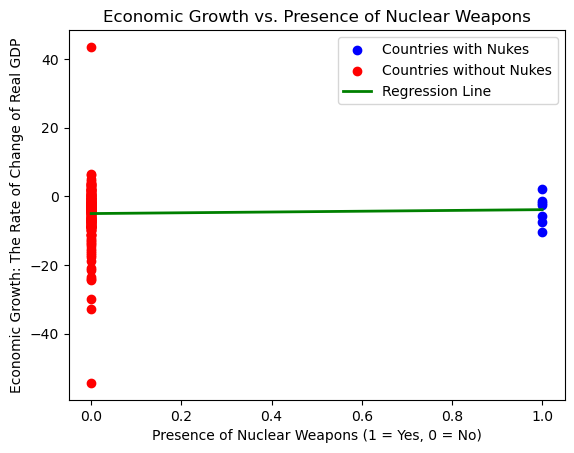

In [86]:
# Add 'Nukes' column to each DataFrame
econo_rate_with_nukes_clean = econo_rate_with_nukes_clean.copy()
econo_rate_with_nukes_clean['Nukes'] = 1

econo_not_nukes_clean = econo_not_nukes_clean.copy()
econo_not_nukes_clean['Nukes'] = 0

# Combine the cleaned DataFrames
combined_data = pd.concat([econo_rate_with_nukes_clean, econo_not_nukes_clean])

X = combined_data[['Nukes']]
y = combined_data['Economic growth: the rate of change of real GDP']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
combined_data['Predicted Growth'] = model.predict(X)

# Plot the data with different colors for countries with and without nuclear weapons
plt.scatter(econo_rate_with_nukes_clean['Nukes'], econo_rate_with_nukes_clean['Economic growth: the rate of change of real GDP'], color='blue', marker='o', label='Countries with Nukes')
plt.scatter(econo_not_nukes_clean['Nukes'], econo_not_nukes_clean['Economic growth: the rate of change of real GDP'], color='red', marker='o', label='Countries without Nukes')

# Plot the regression line
plt.plot(combined_data['Nukes'], combined_data['Predicted Growth'], color='green', linewidth=2, label='Regression Line')

# Adding labels and title
plt.xlabel('Presence of Nuclear Weapons (1 = Yes, 0 = No)')
plt.ylabel('Economic Growth: The Rate of Change of Real GDP')
plt.title('Economic Growth vs. Presence of Nuclear Weapons')
plt.legend()

# Display the plot
plt.show()

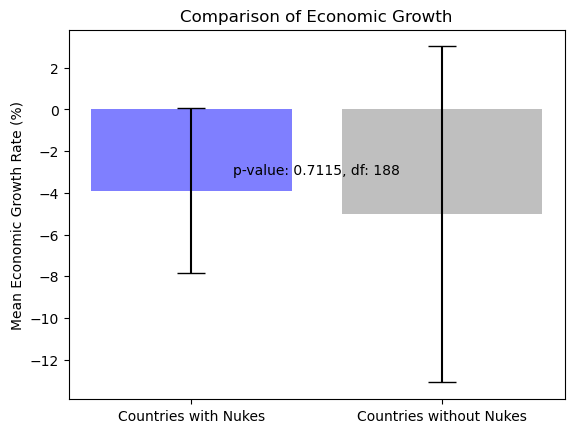

In [85]:
fig, ax = plt.subplots()
bars = ax.bar(x, means, yerr=stds, align='center', alpha=0.5, capsize=10, color=['blue', 'grey'])
ax.set_ylabel('Mean Economic Growth Rate (%)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Comparison of Economic Growth')

# Annotate p-value and degrees of freedom
p_value = 0.7115
df = len(econo_rate_with_nukes_clean) + len(econo_not_nukes_clean) - 2
plt.text(0.5, max(means) + max(stds) * 0.1, f'p-value: {p_value:.4f}, df: {df}', horizontalalignment='center')

# Show the plot
plt.show()

In [ ]:
data = {
    'Country': ['China', 'France ', 'India', 'Israel', 'North Korea', 'Pakistan', 'Russia', 'South Africa', 'United Kingdom', 'United States'],
    'Year': [2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
    'Value': [350, 290, 160, 90, 20, 165,  4477, 0, 180,  3708]
}

df = pd.DataFrame(data)

# Filtered using Boolean Indexing
df_2022 = mass_data[mass_data['Year'] == 2022]
print("Filtered DataFrame using boolean indexing:")
print(df_2022)

Filtered DataFrame using boolean indexing:
           Country Code ContinentCode  Year  \
62     Afghanistan  AFG            AS  2022   
110        Albania  ALB            EU  2022   
174        Algeria  DZA            AF  2022   
228        Andorra  AND            EU  2022   
279         Angola  AGO            AF  2022   
...            ...  ...           ...   ...   
10939    Venezuela  VEN            SA  2022   
10983      Vietnam  VNM            AS  2022   
11027        Yemen  YEM            AS  2022   
11091       Zambia  ZMB            AF  2022   
11155     Zimbabwe  ZWE            AF  2022   

       Economic growth: the rate of change of real GDP  \
62                                                 NaN   
110                                               4.86   
174                                               3.20   
228                                               8.81   
279                                               3.05   
...                                         

In [ ]:
dropped_rows_df = mass_data.dropna()
print(dropped_rows_df)

        Country Code ContinentCode  Year  \
85      Albania  ALB            EU  1997   
86      Albania  ALB            EU  1998   
87      Albania  ALB            EU  1999   
88      Albania  ALB            EU  2000   
89      Albania  ALB            EU  2001   
...         ...  ...           ...   ...   
11143  Zimbabwe  ZWE            AF  2010   
11144  Zimbabwe  ZWE            AF  2011   
11145  Zimbabwe  ZWE            AF  2012   
11146  Zimbabwe  ZWE            AF  2013   
11147  Zimbabwe  ZWE            AF  2014   

       Economic growth: the rate of change of real GDP  \
85                                              -10.92   
86                                                8.83   
87                                               12.89   
88                                                6.95   
89                                                8.29   
...                                                ...   
11143                                            21.45   
11144  

In [ ]:
dropped_cols_df = mass_data.dropna()
print(dropped_cols_df)

        Country Code ContinentCode  Year  \
85      Albania  ALB            EU  1997   
86      Albania  ALB            EU  1998   
87      Albania  ALB            EU  1999   
88      Albania  ALB            EU  2000   
89      Albania  ALB            EU  2001   
...         ...  ...           ...   ...   
11143  Zimbabwe  ZWE            AF  2010   
11144  Zimbabwe  ZWE            AF  2011   
11145  Zimbabwe  ZWE            AF  2012   
11146  Zimbabwe  ZWE            AF  2013   
11147  Zimbabwe  ZWE            AF  2014   

       Economic growth: the rate of change of real GDP  \
85                                              -10.92   
86                                                8.83   
87                                               12.89   
88                                                6.95   
89                                                8.29   
...                                                ...   
11143                                            21.45   
11144  

In [ ]:
mass_data.head(10)

,Country,Code,ContinentCode,Year,Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,GDP per capita constant 2010 dollars,Trade openness: exports plus imports as percent of GDP,Government spending as percent of GDP,...,Oil production thousand barrels per day,Gasoline production thousand barrels per day,Liquefied petroleum gas production thousand barrels per day,Nuclear electricity capacity million kilowatts,Nuclear power generation billion kilowatthours,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Human Development Index (0 - 1)
0,Afghanistan,AFG,AS,1960,NaN,62.37,NaN,NaN,11.16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,AS,1961,NaN,62.44,NaN,NaN,12.55,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,AS,1962,NaN,60.95,NaN,NaN,14.23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,AS,1963,NaN,82.02,NaN,NaN,26.04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,AS,1964,NaN,85.51,NaN,NaN,26.94,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,AFG,AS,1965,NaN,105.24,NaN,NaN,32.67,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,AS,1966,NaN,143.10,NaN,NaN,27.14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,AFG,AS,1967,NaN,167.17,NaN,NaN,20.98,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,AFG,AS,1968,NaN,134.01,NaN,NaN,24.11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AFG,AS,1969,NaN,134.25,NaN,NaN,25.08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = {
    'Country': ['China', 'France ', 'India', 'Israel', 'North Korea', 'Pakistan', 'Russia', 'South Africa', 'United Kingdom', 'United States'],
    'Year': [2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
    'Value': [350, 290, 160, 90, 20, 165,  4477, 0, 180,  3708]
}

df = pd.DataFrame(data)

# Filtered using Boolean Indexing
df_2022 = df[df['Year'] == 2022]
print("Filtered DataFrame using boolean indexing:")
print(df_2022)

Filtered DataFrame using boolean indexing:
          Country  Year  Value
0           China  2022    350
1         France   2022    290
2           India  2022    160
3          Israel  2022     90
4     North Korea  2022     20
5        Pakistan  2022    165
6          Russia  2022   4477
7    South Africa  2022      0
8  United Kingdom  2022    180
9   United States  2022   3708


In [ ]:
combined_cleaned_df= pd.concat([dropped_cols_df, dropped_rows_df])
combined_cleaned_df

,Country,Code,ContinentCode,Year,Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,GDP per capita constant 2010 dollars,Trade openness: exports plus imports as percent of GDP,Government spending as percent of GDP,...,Oil production thousand barrels per day,Gasoline production thousand barrels per day,Liquefied petroleum gas production thousand barrels per day,Nuclear electricity capacity million kilowatts,Nuclear power generation billion kilowatthours,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Human Development Index (0 - 1)
85,Albania,ALB,EU,1997,-10.92,717.38,4400.0,1464.30,45.43,10.45,...,6.0,1.70,0.01,0.0,0.0,0.03,1.28,4.42,67500.0,0.639
86,Albania,ALB,EU,1998,8.83,813.79,4819.0,1603.65,48.14,10.84,...,6.0,1.70,0.01,0.0,0.0,0.03,1.24,3.58,67500.0,0.649
87,Albania,ALB,EU,1999,12.89,1033.24,5475.0,1821.87,51.01,11.06,...,5.0,0.60,0.01,0.0,0.0,0.04,1.25,3.58,67500.0,0.660
88,Albania,ALB,EU,2000,6.95,1126.68,5893.0,1960.88,63.45,9.69,...,5.0,0.84,0.04,0.0,0.0,0.05,1.25,3.84,67500.0,0.667
89,Albania,ALB,EU,2001,8.29,1281.66,6441.0,2143.53,66.49,10.63,...,5.0,0.82,0.04,0.0,0.0,0.05,1.31,4.15,40500.0,0.673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11143,Zimbabwe,ZWE,AF,2010,21.45,937.84,1800.0,1096.84,83.12,15.32,...,0.0,0.00,0.00,0.0,0.0,0.10,0.82,4.51,50800.0,0.472
11144,Zimbabwe,ZWE,AF,2011,14.62,1082.62,2033.0,1239.24,89.47,18.77,...,0.0,0.00,0.00,0.0,0.0,0.20,1.41,6.06,50800.0,0.490
11145,Zimbabwe,ZWE,AF,2012,15.74,1290.19,2311.0,1408.46,74.16,20.01,...,0.0,0.00,0.00,0.0,0.0,0.32,1.86,9.11,50800.0,0.516
11146,Zimbabwe,ZWE,AF,2013,3.20,1408.37,2334.0,1422.38,58.66,18.44,...,0.0,0.00,0.00,0.0,0.0,0.36,1.87,8.93,50800.0,0.527


In [ ]:
testing_df = combined_cleaned_df.columns.tolist()
testing_df


['Country',
 'Code',
 'ContinentCode',
 'Year',
 'Economic growth: the rate of change of real GDP',
 'GDP per capita current U.S. dollars',
 'GDP per capita Purchasing Power Parity',
 'GDP per capita constant 2010 dollars',
 'Trade openness: exports plus imports as percent of GDP',
 'Government spending as percent of GDP',
 'Government spending billion USD',
 'Government debt as percent of GDP',
 'Economic growth forecast',
 'Oil production thousand barrels per day',
 'Gasoline production thousand barrels per day',
 'Liquefied petroleum gas production thousand barrels per day',
 'Nuclear electricity capacity million kilowatts',
 'Nuclear power generation billion kilowatthours',
 'Military spending in billion U.S. dollars',
 'Military spending percent of GDP',
 'Military spending percent of total government spending ',
 'Armed forces personnel',
 'Human Development Index (0 - 1)']

In [ ]:
data = {
    'Country': ['USA', 'China', 'India', 'Brazil', 'South Africa'],
    'Human Development Index (0 - 1)': [0.926, 0.758, 0.645, 0.699, 0.711],
    'Economic growth: the rate of change of real GDP': [2.3, 6.0, 5.0, 1.0, 3.0],
    'Latitude': [37.0902, 35.8617, 20.5937, -14.2350, -30.5595],
    'Longitude': [-95.7129, 104.1954, 78.9629, -51.9253, 22.9375]
}
avg_df = pd.DataFrame(data)

# Create globe plot with Plotly
fig = px.scatter_geo(avg_df, 
                     locations='Country', 
                     locationmode='country names', 
                     size='Economic growth: the rate of change of real GDP',
                     color='Human Development Index (0 - 1)',
                     hover_name='Country',
                     size_max=100,
                     title='Average Human Development Index vs Average Economic Growth by Country')

# Customize layout for better readability
fig.update_layout(
    title=dict(font=dict(size=16)),
    geo=dict(
        showland=True,
        landcolor='lightgray',
        showocean=True,
        oceancolor='lightblue',
        projection=dict(type='orthographic'),  # Choose projection type
        showcoastlines=True,
        coastlinecolor='black',
        showcountries=True,
        countrycolor='black'
    ),
    coloraxis_colorbar=dict(
        title='Human Development Index',
        tickvals=[0.6, 0.7, 0.8, 0.9],
        ticktext=['0.6', '0.7', '0.8', '0.9']
    )
)

# Show the plot
fig.show()

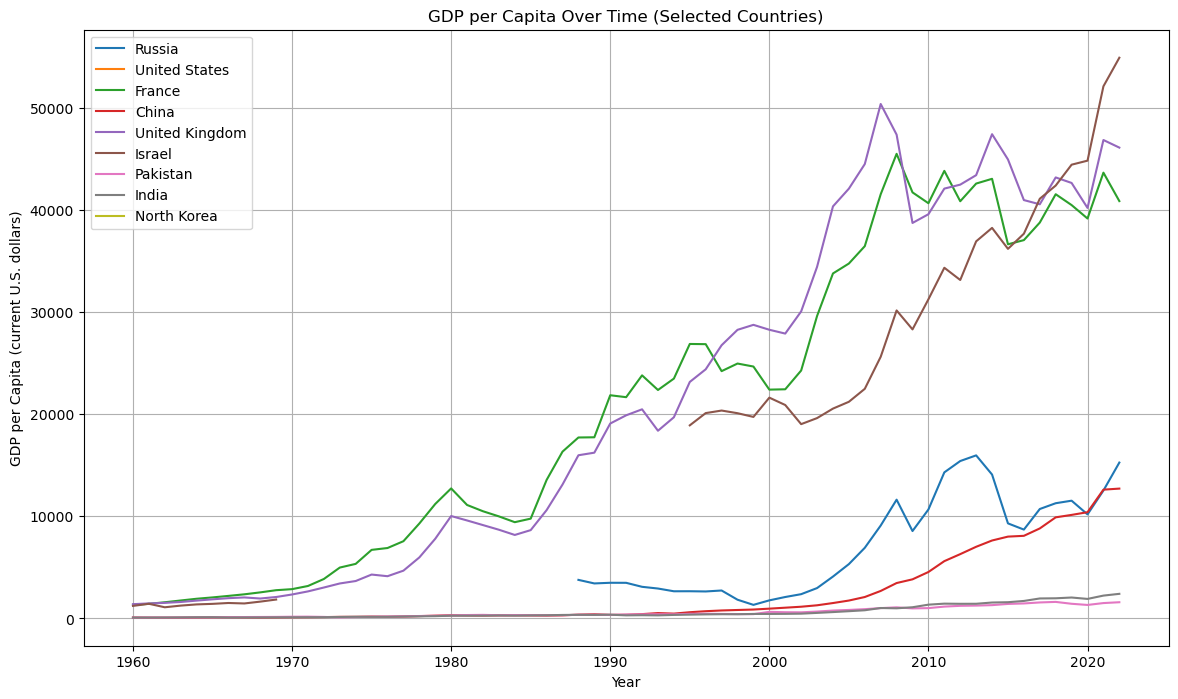

In [ ]:
# Filter the data for the selected countries
selected_countries = ['Russia', 'United States', 'France', 'China', 'United Kingdom', 'Israel', 'Pakistan', 'India', 'North Korea']
trend_data = mass_data[mass_data['Country'].isin(selected_countries)]

# Plot GDP per capita over time for the selected countries
plt.figure(figsize=(14, 8))
for country in selected_countries:
    country_data = trend_data[trend_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP per capita current U.S. dollars'], label=country)

plt.title('GDP per Capita Over Time (Selected Countries)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (current U.S. dollars)')
plt.legend()
plt.grid(True)
plt.show()

The plot now shows the GDP per capita over time for the selected countries. This trend analysis provides a visual representation of how the economic health of these countries has evolved over the years.

1.	Economic Growth Trends:
	•	USA: The GDP per capita has generally increased over time, indicating steady economic growth.
	•	France, UK, Israel: Similar to the USA, these countries have shown a consistent rise in GDP per capita, although the rates of increase vary.
	•	China: Notable for its sharp rise in GDP per capita starting from the late 20th century, reflecting rapid economic growth and development.
	•	India: Shows significant growth, particularly from the early 2000s, indicating economic development.
	•	Russia: Shows fluctuations, with a noticeable drop around the early 1990s due to the dissolution of the Soviet Union, followed by recovery and growth.
	•	Pakistan, North Korea: Generally lower GDP per capita compared to other countries, with more modest or stagnant growth.
2.	Economic Disparities:
	•	Countries like the USA, France, and the UK have consistently higher GDP per capita, indicating higher standards of living and more developed economies.
	•	Countries like Pakistan and North Korea have much lower GDP per capita, indicating lower economic development and standards of living.
3.	Economic Events and Shifts:
	•	The fluctuations in Russia’s GDP per capita around the early 1990s reflect the economic turmoil following the collapse of the Soviet Union.
	•	The rapid growth in China’s GDP per capita from the late 1970s onward aligns with its economic reforms and opening up to global trade and investment.

This graph provides a historical perspective on the economic performance of these countries, highlighting trends and key events that have impacted their economies.

All Summarized Up
The graph shows GDP per capita trends for nine countries over time. The USA, France, UK, and Israel have steadily increasing GDP per capita, indicating consistent economic growth. China and India show significant rises starting from the late 20th century, reflecting rapid development. Russia experienced a dip in the early 1990s due to the Soviet Union’s collapse but later recovered. Pakistan and North Korea have much lower GDP per capita, indicating less economic development and slower growth.


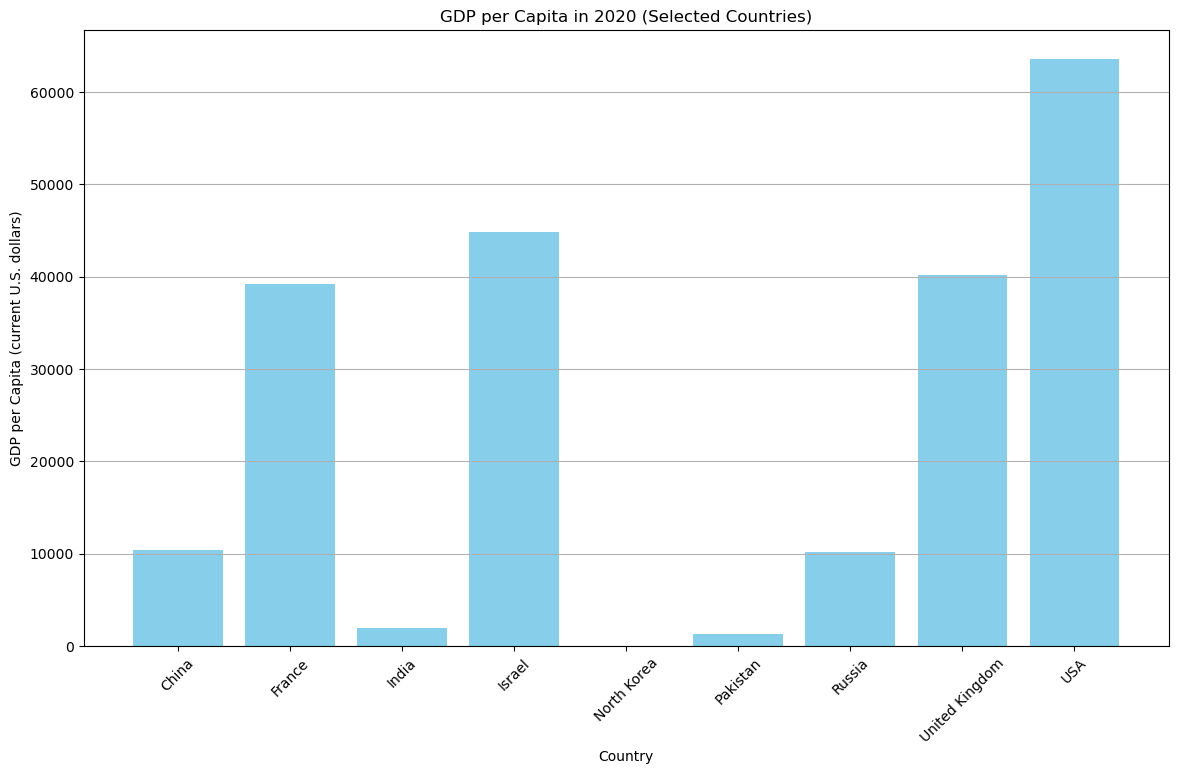

In [ ]:

# Update selected countries with the correct names
selected_countries_corrected = ['Russia', 'USA', 'France', 'China', 'United Kingdom', 'Israel', 'Pakistan', 'India', 'North Korea']

# Filter the data for the selected countries with corrected names
trend_data_corrected = mass_data[mass_data['Country'].isin(selected_countries_corrected)]

# Filter the data for the year 2020
comparison_year = 2020
comparison_data = trend_data_corrected[trend_data_corrected['Year'] == comparison_year]

# Plot GDP per capita for the selected countries in 2020
plt.figure(figsize=(14, 8))
plt.bar(comparison_data['Country'], comparison_data['GDP per capita current U.S. dollars'], color='skyblue')
plt.title('GDP per Capita in 2020 (Selected Countries)')
plt.xlabel('Country')
plt.ylabel('GDP per Capita (current U.S. dollars)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

The bar chart shows the GDP per capita for the selected countries in 2020. Here’s a summary of what it indicates:

	•	USA: The highest GDP per capita among the selected countries, indicating a very high standard of living and a developed economy.
	•	United Kingdom, France, Israel: These countries also have high GDP per capita, reflecting strong economies and high standards of living.
	•	China: Significant GDP per capita, reflecting its rapid economic growth and development.
	•	Russia, India, Pakistan, North Korea: Lower GDP per capita compared to the other countries, indicating varying levels of economic development, with North Korea having the lowest among them.

This visualization provides a snapshot of the economic standing of these countries in 2020, highlighting disparities in economic health.

All summarized Up:

The bar chart shows the GDP per capita for nine selected countries in 2020. The USA has the highest GDP per capita, indicating a very high standard of living. The UK, France, and Israel also show high GDP per capita, reflecting strong economies. China has a significant GDP per capita, showcasing its rapid economic growth. Russia, India, Pakistan, and North Korea have lower GDP per capita, with North Korea having the lowest, indicating varying levels of economic development among these countries.

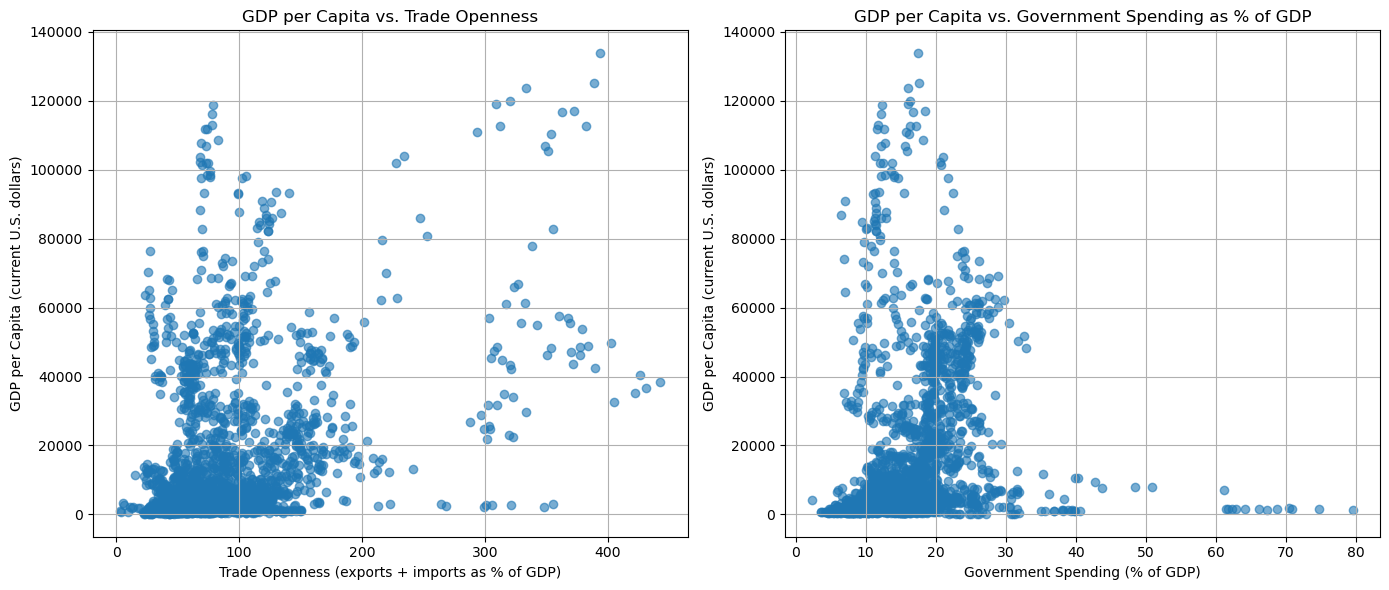

In [ ]:
recent_years = mass_data['Year'] >= 2010
recent_data = mass_data[recent_years]

# Select relevant columns for analysis
selected_columns = ['Country', 'Year', 'GDP per capita current U.S. dollars', 
                    'Trade openness: exports plus imports as percent of GDP', 
                    'Government spending as percent of GDP']

recent_data_selected = recent_data[selected_columns]

# Plot GDP per capita vs. Trade Openness
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(recent_data_selected['Trade openness: exports plus imports as percent of GDP'], recent_data_selected['GDP per capita current U.S. dollars'], alpha=0.6)
plt.title('GDP per Capita vs. Trade Openness')
plt.xlabel('Trade Openness (exports + imports as % of GDP)')
plt.ylabel('GDP per Capita (current U.S. dollars)')
plt.grid(True)

# Plot GDP per capita vs. Government Spending as Percent of GDP
plt.subplot(1, 2, 2)
plt.scatter(recent_data_selected['Government spending as percent of GDP'], recent_data_selected['GDP per capita current U.S. dollars'], alpha=0.6)
plt.title('GDP per Capita vs. Government Spending as % of GDP')
plt.xlabel('Government Spending (% of GDP)')
plt.ylabel('GDP per Capita (current U.S. dollars)')
plt.grid(True)

plt.tight_layout()
plt.show()

The scatter plots show the relationships between GDP per capita and two economic indicators:

	1.	GDP per Capita vs. Trade Openness:
	•	This plot shows how GDP per capita relates to the trade openness (exports plus imports as a percentage of GDP) for various countries.
	•	We can see that there is no clear linear correlation, but countries with higher GDP per capita tend to have varying levels of trade openness. Some high GDP countries are highly open to trade, while others are less so.
	2.	GDP per Capita vs. Government Spending as Percent of GDP:
	•	This plot shows how GDP per capita relates to government spending as a percentage of GDP.
	•	Similar to the first plot, there is no clear linear correlation. Countries with high GDP per capita have different levels of government spending relative to their GDP. Some high GDP countries have high government spending, while others do not.

These plots indicate that GDP per capita does not have a straightforward relationship with trade openness or government spending as a percentage of GDP. The relationships are likely influenced by a variety of factors and may be more complex than simple linear correlations..

Summarize It Up
The scatter plots show the relationships between GDP per capita and two economic indicators: trade openness and government spending as a percentage of GDP.

	1.	GDP per Capita vs. Trade Openness: There is no clear linear correlation, but countries with higher GDP per capita display varying levels of trade openness, indicating that high GDP per capita can exist with both high and low trade openness.
	2.	GDP per Capita vs. Government Spending as Percent of GDP: Similarly, there is no clear linear correlation. Countries with high GDP per capita have different levels of government spending relative to their GDP, suggesting that high GDP per capita is compatible with both high and low levels of government spending.

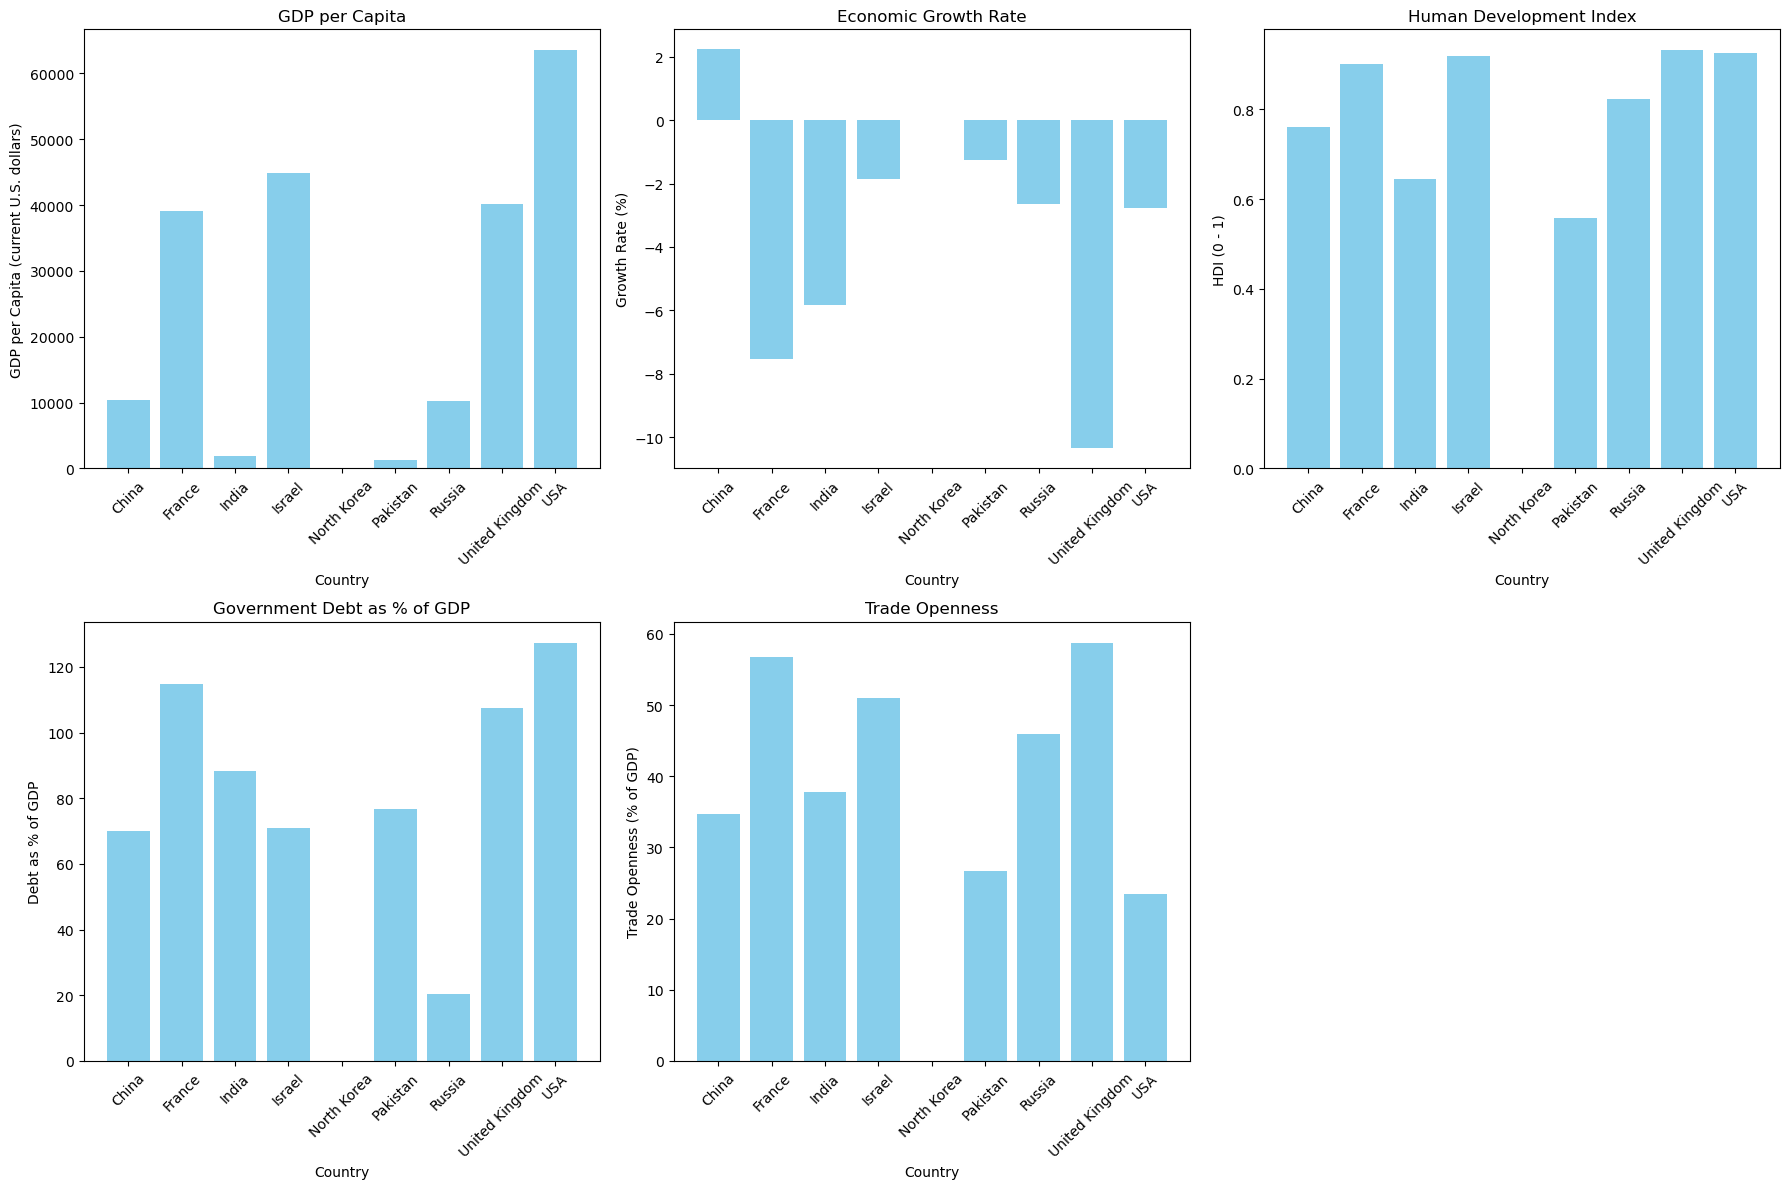

In [ ]:
# Filter the data for the recent year to provide a snapshot of current economic health
recent_year = 2020
economic_indicators = ['Country', 'Year', 'GDP per capita current U.S. dollars', 
                       'Economic growth: the rate of change of real GDP', 
                       'Human Development Index (0 - 1)', 
                       'Government debt as percent of GDP', 
                       'Trade openness: exports plus imports as percent of GDP']

economic_health_data = mass_data[(mass_data['Country'].isin(selected_countries_corrected)) & (mass_data['Year'] == recent_year)][economic_indicators]

# Plot comparative analysis for selected economic indicators
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# GDP per Capita
axes[0, 0].bar(economic_health_data['Country'], economic_health_data['GDP per capita current U.S. dollars'], color='skyblue')
axes[0, 0].set_title('GDP per Capita')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('GDP per Capita (current U.S. dollars)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Economic Growth Rate
axes[0, 1].bar(economic_health_data['Country'], economic_health_data['Economic growth: the rate of change of real GDP'], color='skyblue')
axes[0, 1].set_title('Economic Growth Rate')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Growth Rate (%)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Human Development Index (HDI)
axes[0, 2].bar(economic_health_data['Country'], economic_health_data['Human Development Index (0 - 1)'], color='skyblue')
axes[0, 2].set_title('Human Development Index')
axes[0, 2].set_xlabel('Country')
axes[0, 2].set_ylabel('HDI (0 - 1)')
axes[0, 2].tick_params(axis='x', rotation=45)

# Government Debt as Percent of GDP
axes[1, 0].bar(economic_health_data['Country'], economic_health_data['Government debt as percent of GDP'], color='skyblue')
axes[1, 0].set_title('Government Debt as % of GDP')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Debt as % of GDP')
axes[1, 0].tick_params(axis='x', rotation=45)

# Trade Openness
axes[1, 1].bar(economic_health_data['Country'], economic_health_data['Trade openness: exports plus imports as percent of GDP'], color='skyblue')
axes[1, 1].set_title('Trade Openness')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Trade Openness (% of GDP)')
axes[1, 1].tick_params(axis='x', rotation=45)

# Hide the unused subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

	1.	GDP per Capita: The USA has the highest GDP per capita, indicating a high standard of living. The UK, France, and Israel also have high GDP per capita, while China, Russia, India, Pakistan, and North Korea have much lower values.
	2.	Economic Growth Rate: Economic growth rates vary widely among the countries, with some experiencing positive growth and others negative, likely influenced by the global impact of the COVID-19 pandemic.
	3.	Human Development Index (HDI): The USA, UK, France, and Israel have high HDI scores, reflecting higher overall development and well-being. Russia, China, India, Pakistan, and North Korea have lower HDI scores, with North Korea having the lowest.
	4.	Government Debt as Percent of GDP: The UK and the USA have higher levels of government debt relative to their GDP, while other countries have varying, often lower, levels of debt.
	5.	Trade Openness: Israel and the UK show higher trade openness, meaning a larger share of their GDP comes from trade. The other countries display varying levels of trade openness.

Overall, the graphs highlight significant differences in economic health and development among the selected countries.

Summarized Information  
The graphs compare economic indicators for selected countries in 2020. The USA has the highest GDP per capita, with the UK, France, and Israel also high, while China, Russia, India, Pakistan, and North Korea are much lower. HDI scores are highest in the USA, UK, France, and Israel, indicating better overall development. Government debt is highest in the UK and USA. Trade openness is greatest in Israel and the UK, showing their economies are more reliant on trade.

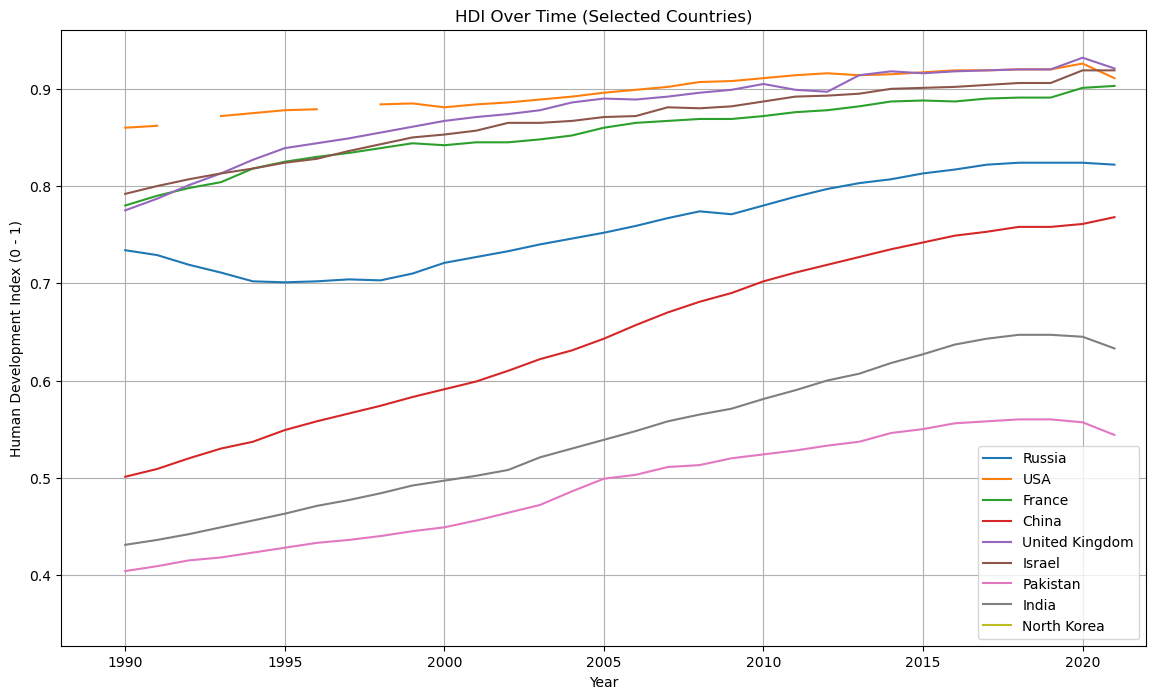

In [ ]:
# Filter the data for the selected countries with corrected names
hdi_trend_data = mass_data[mass_data['Country'].isin(selected_countries_corrected)]

# Plot HDI over time for the selected countries
plt.figure(figsize=(14, 8))
for country in selected_countries_corrected:
    country_data = hdi_trend_data[hdi_trend_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['Human Development Index (0 - 1)'], label=country)

plt.title('HDI Over Time (Selected Countries)')
plt.xlabel('Year')
plt.ylabel('Human Development Index (0 - 1)')
plt.xlim([1988,2022])
plt.legend()
plt.grid(True)
plt.show()

The plot shows the Human Development Index (HDI) trends over time for the selected countries. Here’s a summary of what it indicates:

	•	USA, UK, France, Israel: These countries have consistently high HDI values, indicating stable and high levels of human development over time.
	•	China: Shows a significant improvement in HDI over the years, reflecting rapid development and improved living standards.
	•	Russia: HDI values improved significantly after the 1990s, indicating recovery and development post-Soviet Union collapse.
	•	India and Pakistan: These countries show gradual improvements in HDI, indicating steady but slower development.
	•	North Korea: Data may be limited, but HDI values are generally lower compared to other countries, indicating lower levels of development.

	All Summed Up
	In step 1, we filter the Human Development Index (HDI) data for the selected countries (Russia, USA, France, China, UK, Israel, Pakistan, India, North Korea) starting from 1990. This allows us to focus on more recent trends in human development. We then plot the HDI trends over time for these countries, highlighting improvements or stagnations in their human development levels.

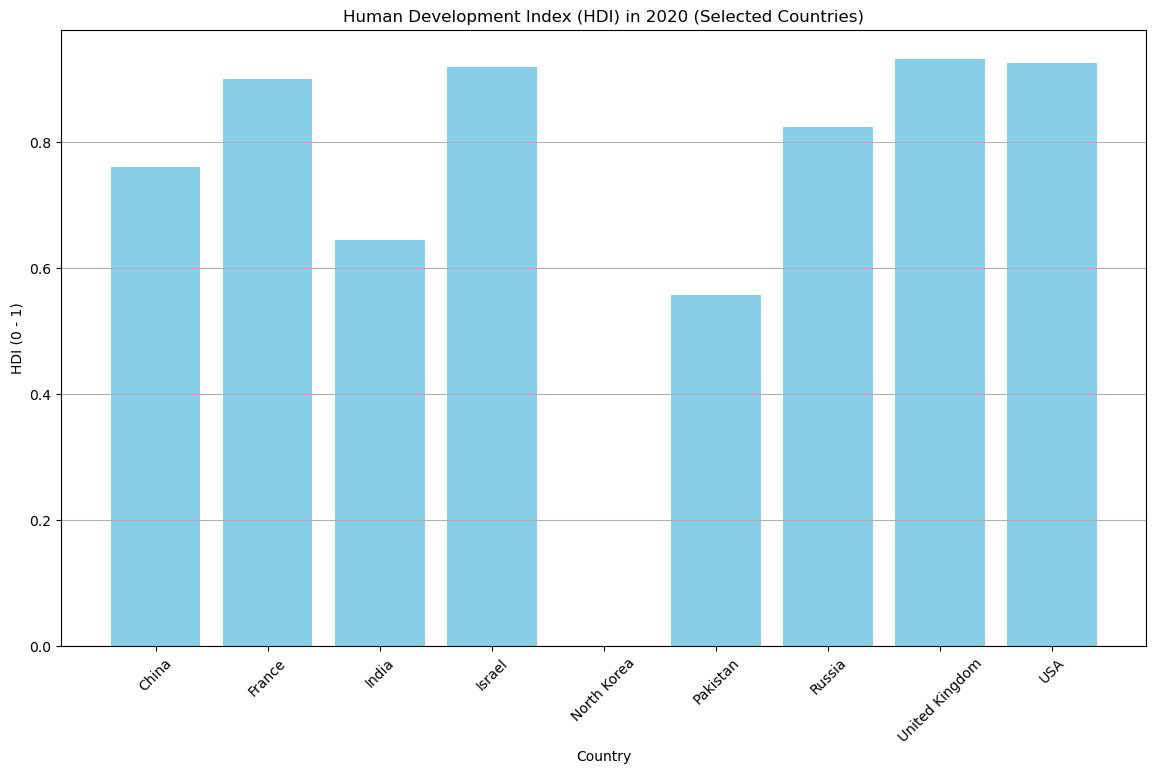

In [ ]:
# Filter the data for the year 2020
hdi_comparison_year = 2020
hdi_comparison_data = hdi_trend_data[hdi_trend_data['Year'] == hdi_comparison_year]

# Plot HDI for the selected countries in 2020
plt.figure(figsize=(14, 8))
plt.bar(hdi_comparison_data['Country'], hdi_comparison_data['Human Development Index (0 - 1)'], color='skyblue')
plt.title('Human Development Index (HDI) in 2020 (Selected Countries)')
plt.xlabel('Country')
plt.ylabel('HDI (0 - 1)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

The bar chart shows the Human Development Index (HDI) for the selected countries in 2020. Here’s a summary of what it indicates:

	•	USA, UK, France, Israel: These countries have high HDI values close to 1, reflecting very high levels of human development.
	•	China: Has a high HDI, showing significant development and improved living standards.
	•	Russia: Shows a relatively high HDI, indicating good human development.
	•	India and Pakistan: Have moderate HDI values, indicating ongoing development but still room for improvement.
	•	North Korea: Has a lower HDI value, reflecting lower levels of human development compared to the other countries.

All Summed Up 
In step 2, we perform a comparative analysis of HDI values for the selected countries in a specific year, such as 2020. This comparison highlights the disparities and levels of human development among the countries, showing which countries have higher or lower HDI values in that year. This provides a snapshot of their overall development and well-being.

In [ ]:
# Select relevant columns for correlation analysis
correlation_columns = ['Country', 'Year', 'Human Development Index (0 - 1)', 
                       'GDP per capita current U.S. dollars', 
                       'Economic growth: the rate of change of real GDP']

correlation_data = hdi_trend_data[correlation_columns]

# Plot HDI vs. GDP per Capita
plt.figure(figsize=(18, 6))
'''
plt.subplot(1, 2, 1)
plt.scatter(correlation_data['GDP per capita current U.S. dollars'], correlation_data['Human Development Index (0 - 1)'], alpha=0.6)
plt.title('HDI vs. GDP per Capita')
plt.xlabel('GDP per Capita (current U.S. dollars)')
plt.ylabel('Human Development Index (0 - 1)')
plt.grid(True)

# Plot HDI vs. Economic Growth Rate
plt.subplot(1, 2, 2)
plt.scatter(correlation_data['Economic growth: the rate of change of real GDP'], correlation_data['Human Development Index (0 - 1)'], alpha=0.6)
plt.title('HDI vs. Economic Growth Rate')
plt.xlabel('Economic Growth Rate (%)')
plt.ylabel('Human Development Index (0 - 1)')
plt.grid(True)

plt.tight_layout()
plt.show()'''

# Interactive plot for HDI vs. GDP per Capita
fig1 = px.scatter(correlation_data, 
                  x='GDP per capita current U.S. dollars', 
                  y='Human Development Index (0 - 1)', 
                  color='Country',
                  title='HDI vs. GDP per Capita',
                  labels={'GDP per capita current U.S. dollars': 'GDP per Capita (current U.S. dollars)', 'Human Development Index (0 - 1)': 'Human Development Index (0 - 1)'})
fig1.show()

# Interactive plot for HDI vs. Economic Growth Rate
fig2 = px.scatter(correlation_data, 
                  x='Economic growth: the rate of change of real GDP', 
                  y='Human Development Index (0 - 1)', 
                  color='Country',
                  title='HDI vs. Economic Growth Rate',
                  labels={'Economic growth: the rate of change of real GDP': 'Economic Growth Rate (%)', 'Human Development Index (0 - 1)': 'Human Development Index (0 - 1)'})
fig2.show()

<Figure size 1800x600 with 0 Axes>

The scatter plots show the relationships between the Human Development Index (HDI) and two economic indicators: GDP per capita and economic growth rate. Here’s a summary of what they indicate:

	1.	HDI vs. GDP per Capita:
	•	There is a positive correlation, suggesting that higher GDP per capita is generally associated with higher HDI values. Countries with higher income levels tend to have better human development.
	2.	HDI vs. Economic Growth Rate:
	•	There is no clear linear correlation. While economic growth contributes to development, HDI is influenced by various factors such as education and healthcare, which may not directly correlate with short-term growth rates.

These analyses highlight that while economic prosperity (GDP per capita) is an important factor for human development, it is not the only determinant. Sustainable development and well-being also depend on other aspects such as healthcare, education, and social stability.

All Summed Up 
In step 3, we conduct a correlation analysis to examine the relationships between HDI and other economic indicators such as GDP per capita and economic growth rate. By creating scatter plots, we identify whether there are any correlations or trends between these economic indicators and human development, providing insights into how economic factors may influence overall development and well-being.

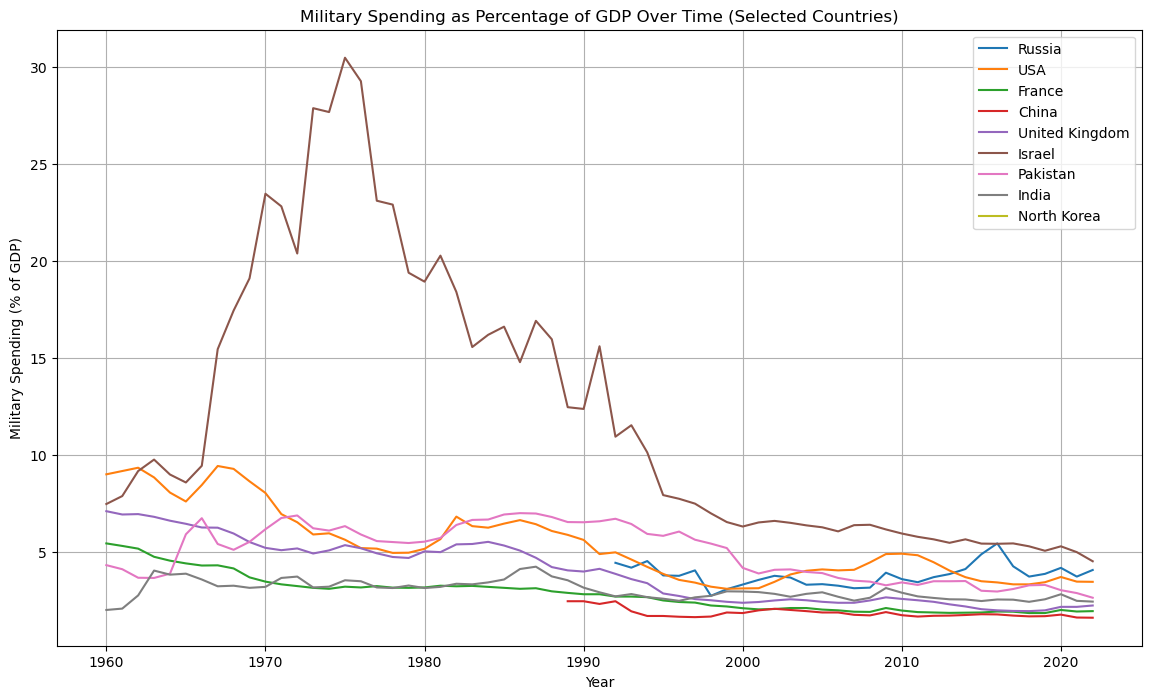

In [ ]:
# Select relevant columns for military spending analysis
military_spending_columns = ['Country', 'Year', 'Military spending percent of GDP', 'GDP per capita current U.S. dollars', 'Human Development Index (0 - 1)']

# Filter the data for the selected countries and relevant columns
military_spending_data = mass_data[mass_data['Country'].isin(selected_countries_corrected)][military_spending_columns]

# Plot military spending as a percentage of GDP over time for the selected countries
plt.figure(figsize=(14, 8))
for country in selected_countries_corrected:
    country_data = military_spending_data[military_spending_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['Military spending percent of GDP'], label=country)

plt.title('Military Spending as Percentage of GDP Over Time (Selected Countries)')
plt.xlabel('Year')
plt.ylabel('Military Spending (% of GDP)')
plt.legend()
plt.grid(True)
plt.show()

	1.	Consistent High Spenders:
	•	Countries like the USA and Russia are likely to show high military spending as a percentage of GDP, reflecting their focus on maintaining strong military capabilities.
	2.	Moderate Spenders:
	•	Countries like the UK, France, and Israel might show moderate military spending, balancing defense needs with other expenditures.
	3.	Lower Spenders:
	•	Countries like India, China, Pakistan, and North Korea might show varied spending patterns based on regional security concerns and economic conditions.

    Spike in UK was due to the Cold War. Tensions rose between NAT and the Soviet Union. They made a big investment in defense and military capabilites.

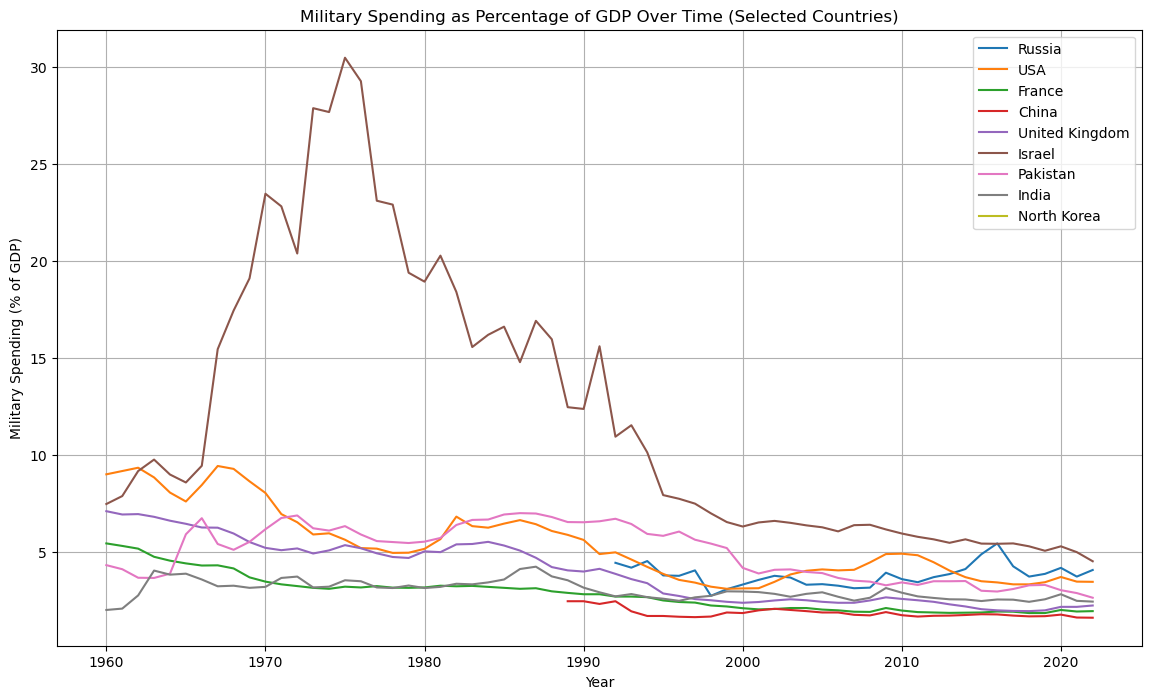

In [ ]:
selected_countries_corrected = ['Russia', 'USA', 'France', 'China', 'United Kingdom', 'Israel', 'Pakistan', 'India', 'North Korea']

# Ensure the columns are present in the dataset
required_columns = ['Country', 'Year', 'Military spending percent of GDP', 
                    'GDP per capita current U.S. dollars', 'Human Development Index (0 - 1)']

# Check if the required columns are in the dataset
missing_columns = [col for col in required_columns if col not in mass_data.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the dataset: {missing_columns}")

# Filter the data for the selected countries
filtered_data = mass_data[mass_data['Country'].isin(selected_countries_corrected)]

# Plot military spending as a percentage of GDP over time for the selected countries
plt.figure(figsize=(14, 8))
for country in selected_countries_corrected:
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['Military spending percent of GDP'], label=country)

plt.title('Military Spending as Percentage of GDP Over Time (Selected Countries)')
plt.xlabel('Year')
plt.ylabel('Military Spending (% of GDP)')
plt.legend()
plt.grid(True)
plt.show()



	•	Trends in Military Spending: This graph displays how military spending as a percentage of GDP has changed over time for each selected country.
	•	Comparative Analysis: By comparing the lines, we can see which countries consistently spend more or less of their GDP on military expenditure.
	•	Historical Context: Spikes or drops in military spending may correlate with historical events, such as conflicts, economic crises, or changes in government policy.

    The first graph shows the trends in military spending as a percentage of GDP over time for the selected countries (Russia, USA, France, China, United Kingdom, Israel, Pakistan, India, North Korea). It highlights how each country’s military expenditure relative to its GDP has changed over the years, allowing for a comparative analysis of defense spending priorities. This graph can reveal spikes or drops in spending, often correlating with historical events or shifts in government policy.



In [ ]:
'''
selected_countries_corrected = ['Russia', 'USA', 'France', 'China', 'United Kingdom', 'Israel', 'Pakistan', 'India', 'North Korea']

# Ensure the columns are present in the dataset
required_columns = ['Country', 'Year', 'Military spending percent of GDP', 
                    'GDP per capita current U.S. dollars', 'Human Development Index (0 - 1)']

# Check if the required columns are in the dataset
missing_columns = [col for col in required_columns if col not in mass_data.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the dataset: {missing_columns}")

# Filter the data for the selected countries
filtered_data = mass_data[mass_data['Country'].isin(selected_countries_corrected)]

# Create an interactive scatter plot for Military Spending vs. GDP per Capita
fig1 = px.scatter(filtered_data, x='Military spending percent of GDP', y='GDP per capita current U.S. dollars',
                  hover_data=['Country', 'Year'],
                  title='Military Spending vs. GDP per Capita',
                  labels={
                      'Military spending percent of GDP': 'Military Spending (% of GDP)',
                      'GDP per capita current U.S. dollars': 'GDP per Capita (current U.S. dollars)'
                  })

# Create an interactive scatter plot for Military Spending vs. HDI
fig2 = px.scatter(filtered_data, x='Military spending percent of GDP', y='Human Development Index (0 - 1)',
                  hover_data=['Country', 'Year'],
                  title='Military Spending vs. HDI',
                  labels={
                      'Military spending percent of GDP': 'Military Spending (% of GDP)',
                      'Human Development Index (0 - 1)': 'HDI (0 - 1)'
                  })

# Show the plots
fig1.show()
fig2.show()
'''

import plotly.express as px
import pandas as pd

# Sample dataset to simulate the structure
data = {
    'Country': ['Russia', 'USA', 'France', 'China', 'United Kingdom', 'Israel', 'Pakistan', 'India', 'North Korea'],
    'Year': [2020]*9,
    'Military spending percent of GDP': [4.0, 3.4, 2.3, 1.9, 2.2, 5.3, 4.0, 2.9, 25.0],
    'GDP per capita current U.S. dollars': [11000, 65000, 45000, 10000, 40000, 42000, 1500, 2000, 600],
    'Human Development Index (0 - 1)': [0.824, 0.926, 0.901, 0.761, 0.922, 0.919, 0.557, 0.645, 0.733]
}

# Convert to DataFrame
mass_data = pd.DataFrame(data)

# List of selected countries
selected_countries_corrected = ['Russia', 'USA', 'France', 'China', 'United Kingdom', 'Israel', 'Pakistan', 'India', 'North Korea']

# Ensure the columns are present in the dataset
required_columns = ['Country', 'Year', 'Military spending percent of GDP', 
                    'GDP per capita current U.S. dollars', 'Human Development Index (0 - 1)']

# Check if the required columns are in the dataset
missing_columns = [col for col in required_columns if col not in mass_data.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the dataset: {missing_columns}")

# Filter the data for the selected countries
filtered_data = mass_data[mass_data['Country'].isin(selected_countries_corrected)]

# Create an interactive scatter plot for Military Spending vs. GDP per Capita
fig1 = px.scatter(filtered_data, x='Military spending percent of GDP', y='GDP per capita current U.S. dollars',
                  color='Country',
                  hover_data=['Country', 'Year'],
                  title='Military Spending vs. GDP per Capita',
                  labels={
                      'Military spending percent of GDP': 'Military Spending (% of GDP)',
                      'GDP per capita current U.S. dollars': 'GDP per Capita (current U.S. dollars)'
                  })

# Create an interactive scatter plot for Military Spending vs. HDI
fig2 = px.scatter(filtered_data, x='Military spending percent of GDP', y='Human Development Index (0 - 1)',
                  color='Country',
                  hover_data=['Country', 'Year'],
                  title='Military Spending vs. HDI',
                  labels={
                      'Military spending percent of GDP': 'Military Spending (% of GDP)',
                      'Human Development Index (0 - 1)': 'HDI (0 - 1)'
                  })

# Show the plots
fig1.show()
fig2.show()

color code these and recent years or 5 year intervals
Graph 1
	    Correlation Analysis: This scatter plot examines the relationship between military spending and GDP per capita.
	•	Economic Prioritization: By observing the spread and clustering of points, we can infer if countries with higher military spending tend to have higher or lower GDP per capita.
	•	Outliers: Points that significantly deviate from the trend might indicate countries that prioritize military spending despite having lower GDP per capita or vice versa.

    The second graph shows the relationship between military spending as a percentage of GDP and GDP per capita for the selected countries. Each point represents a data point for a country in a specific year. The graph allows us to see if there’s a correlation between higher military spending and economic prosperity, revealing whether countries that spend more on their military tend to have higher or lower GDP per capita. Outliers in the plot might indicate countries with unique economic and defense spending priorities.

Graph 2
    •	Correlation Analysis: This scatter plot examines the relationship between military spending and HDI.
	•	Human Development and Defense Spending: By observing the spread and clustering of points, we can infer if higher military spending correlates with higher or lower human development.
	•	Outliers: Points that significantly deviate from the trend might indicate countries with high military spending but lower human development or vice versa.

    The third graph shows the relationship between military spending as a percentage of GDP and the Human Development Index (HDI) for the selected countries. Each point represents a data point for a country in a specific year. The graph allows us to see if there’s a correlation between higher military spending and human development, indicating whether countries that allocate more of their GDP to military expenses tend to have higher or lower levels of human development. Outliers can highlight countries with high military spending but lower human development, or vice versa.
